In [1]:
# Set up environment with correct dependencies
using Pkg
Pkg.activate(".")
Pkg.instantiate()

 Activating environment at `~/GitHub/MathSys/teaching/MA934/MA934-slides/Project.toml`


In [2]:
using Plots
using LaTeXStrings
using Revise
pyplot()
# Set default fonts for all plots
fnt = Plots.font("DejaVu Sans", 8.0)
default(titlefont=fnt, guidefont=fnt, tickfont=fnt, legendfont=fnt)

## MA934

## Data types and data structures

### There is more to life than linear arrays...

### Data types

A *data type* is an attribute of data that tells the compiler/interpreter how that data will be used. For example, ```Float64``` and ```Int64``` are both 64-bit binary strings but are interpreted differently. 

*Primitive* types: ```Int64``` etc, ```Float32``` etc, ```Bool```,  ```Char```

*Composite* types: derived from multiple primitive types: ```Array```, ```struct```.

Julia also provides some special types: ```Any```, ```Nothing```, ```Union```  - see the [documentation](https://docs.julialang.org/en/v1/base/base/#Special-Types) for others.


### Working with types

Julia provides functions for type checking that can be very useful:

* ```typeof(x)``` : returns the type of x
* ```isa(x, T)``` : checks if x has type T

In [4]:
n = Int64(10)
x = Float64(10.0)
println((typeof(n), typeof(x)))

(Int64, Float64)


In [5]:
println((isa(x, Int64), isa(x,Float64)))

(false, true)


Note ```DataType``` is itself a type:

In [6]:
typeof(typeof(x))

DataType

### The ```Nothing``` special type

Confusingly, ```Nothing``` is a type that can only take the special value ```nothing```. This represents the value returned by functions which do not return anything.

In [7]:
nada = Nothing()
println("Type of nada: ", typeof(nada), ",  Value of nada : ", nada)

Type of nada: Nothing,  Value of nada : nothing


Similar to the ```NULL``` value in C or ```None``` in Python.

### The ```Union``` special type

The ```Union``` is a type that includes all instances of any of its argument types.


In [12]:
intOrString = Union{Int64, String}
n = Int64(42)
s = "Hello world"
println((typeof(n), typeof(s)))
println((isa(n, intOrString), isa(s, intOrString)))


(Int64, String)
(true, true)


Particularly useful are unions like ```Union(Float64, Nothing)``` to represent the possibility of absent values.

### Composite data types

A collection of named fields, that can be treated as a single value. 
* Defined in Julia using the ```struct``` keyword:
* By default a struct cannot be changed once instantiated.
* Use ```mutable struct``` keyword to change this.

In [15]:
module tmp

mutable struct point
    x::Float64
    y::Float64
    label::String
end

end
P = tmp.point(1.0, 2.0, "point A")
println("x = ", P.x, ",  y = ", P.y, ", label is: ", P.label )

x = 1.0,  y = 2.0, label is: point A


In [16]:
P.x = -1.0

-1.0

### Constructors

* A *constructor* is a function called to initialise a struct.
* A default constructor is defined automatically:
```
point(::Float64, ::Float64, ::String)
```
* Two types: *outer* and *inner*.

We can define our own outer constructors like any other function:

In [23]:
point(x::Float64) = tmp.point(x,x,"")

point (generic function with 1 method)

In [24]:
P = point(1.0)
P

Main.tmp.point(1.0, 1.0, "")

### Inner constructors


1. are declared *inside* the type declaration.
2. have access to special function ```new``` that creates an uninitialised instance of the type.

Useful for enforcing constraints and building self-referential objects.

In [25]:
module tmp
struct OrderedPair
    x::Real
    y::Real
    OrderedPair(x,y) = x > y ? 
        println("out of order") : 
        new(x,y)
end
end

Main.tmp

In [28]:
x = tmp.OrderedPair(2.3, 3.0)

Main.tmp.OrderedPair(2.3, 3.0)

In [ ]:
### More explicit version of the inner constructor example
module tmp
struct OrderedPair
    x::Real
    y::Real
    
    function OrderedPair(x,y)
        println("This is the inner constructor")
        if x > y 
            println("out of order")
        else
            return new(x,y)
        end
    end
    
end
end

x = tmp.OrderedPair(1.0, 2.0)

### Data structures?

A data structure is a specialised way of organising data in a computer so that certain operations can be performed efficiently.

* Composite types are simplest examples.
* *Static* data structures have a fixed size. *Dynamic* data structures can grow and shrink depending on the data that they contain.
* Associated with almost every data structure is a set of basic operations that it is designed to perform efficiently (conversely some other operations might be very inefficient or impossible.)


### Examples of some common data structures

* Linear arrays
* Linked lists
* Stacks
* Queues

* Hash tables
* Binary trees
* Heaps
* Graphs

### Arrays

<img src="files/images/array.png" alt="array" style="width: 600px;"/>  


Basic operations:

* access(i) : return get value at index i
* update(i,v) : set value at index i equal to v.

insert() and delete() not possible - static data structure.

Building block for many other data structures.

### Linked lists

<img src="files/images/list.png" alt="array" style="width: 1000px;"/>  


A linked list is a sequence of elements called *nodes* in linear order that are linked to each other.

The first/last node is called the *head*/*tail* respectively.

### Linked lists

<img src="files/images/list.png" alt="array" style="width: 1000px;"/>  


* Each node consists of a data container and a link to the next node.
* Dynamic data structure but only sequential access is possible.
* Variants: singly linked, doubly linked, circularly linked.

### Linked lists : basic operations

<img src="files/images/list.png" alt="array" style="width: 1000px;"/>  


* search(x): determine if data x is in the list (and perhaps return a reference to it).
* insert(x): add new node with data x at beginning/middle/end. 
* delete(x): delete node with data x from the list.

### Aside: pointers and references

Discussions of linked lists often refer to linking nodes using *pointers*. A pointer (especially in C/C++) is a data type that contains the memory address of another object/variable.

Julia does not have pointers - variables are accessed via *references*.

A reference is also a data type that contains the memory address of another object/variable.

### Aside: pointers and references - so what's the difference?

* A reference must refer to an existing object. It cannot change once created.
* A pointer can be NULL and can be updated to refer to a different memory location by changing its value.

Pointers are powerful but dangerous:
* segmentation faults
* memory leaks
* dangling pointers

If [Maslov](https://en.wikipedia.org/wiki/Law_of_the_instrument) were a software engineer:

"When the only tool you have is C++, every problem looks like your thumb".

### Stacks

<img src="files/images/stack.png" alt="array" style="width: 400px;"/>  


A *stack* is a linear data store with a LIFO (Last In First Out) access protocol: the last inserted element must be accessed first.

Can be static or dynamic.

So named because it resembles a stack of plates...

Used, for example, to implement function calls in recursive programming. 


### Stacks :  basic operations

<img src="files/images/stack.png" alt="array" style="width: 400px;"/>  


* push(x) : add the element x to the top of the stack.
* pop() : remove the top element from the stack and return it.
* peek() : return the top elemt from the stack without deleting it.
* isempty() : check if the stack is empty.

### Queues

<img src="files/images/queue.png" alt="queue" style="width: 400px;"/>  

A *queue* is a linear data store with a FIFO (First In First Out) access protocol: the first inserted element must be accessed first.

Can be static or dynamic.

So named because it resembles a real queue!

Used, for example, to serve requests on a shared resource.

### Queues : basic operations

<img src="files/images/queue.png" alt="queue" style="width: 400px;"/>  

* enqueue(x): insert element x to the end of the queue. 
* dequeue(): return the element at the beginning of the queue and delete it from the queue.

### Hash tables (also associative array or dictionary)

<img src="files/images/hash.png" alt="hash" style="width: 600px;"/>  

A hash table stores a set of values, 
$$\left\{A, B, C, D, E\right\},$$ 
associated with a set of keys,
$$\left\{key\ A, key\ B, key\ C, key\ D, key\ E\right\},$$
in a way that supports efficient lookup - i.e. $\mathcal{O}(1)$.

Direct addressing (convert key X to an integer, k, and store value X in slot k) is often not feasible.

### Hash tables - an example

Suppose the keys are integers in the range 1 - 1024 and we need to store, say, 4 random key-value pairs. 

* Direct addressing would require an array of size 1024.
* Instead use an array of size 23 and the hash function
$$h(k) = k\%23 + 1$$

In [8]:
keys = rand(0:1024, 4)
idx = [k%23 + 1 for k in keys]
for i in 1:4
    println("Key ", keys[i], " -> ", " index ",idx[i])
end

Key 352 ->  index 8
Key 356 ->  index 12
Key 308 ->  index 10
Key 987 ->  index 22


Of course need a strategy to resolve conflicts. e.g. use buckets.

Probability of conflicts grows as the *load factor* (# entries/#buckets) increases.

### Binary trees

<img src="files/images/tree.png" alt="tree" style="width: 600px;"/>  

A binary tree is a hierarchical data structure in which nodes are linked together in parent/child relationships.

Each node contains a data container and pointers/references to left and right child nodes.

*Height* of the tree : maximal number of edges from the *root* to the *leaves*.

### Structural recursion

Note that linked lists and binary trees have a recursive aspect:

* A linked list is either empty, or a node followed by a list.
* A binary tree is either empty, or a node with two binary trees as children.

Such data structures can actually be *defined* in a self-referential way. This is called *structural recursion*.

### Structural recursion in Julia

Recursive definition of the linked list type:

```
mutable struct LinkedList
    data::Any
    next::LinkedList
end
```

In [9]:
module tmp
mutable struct LinkedList
    data::Any
    next::LinkedList
end
end

Main.tmp

Doesn't quite work due to initialisation problem:

In [10]:
L = tmp.LinkedList(0.0,nothing)

LoadError: MethodError: Cannot `convert` an object of type Nothing to an object of type Main.tmp.LinkedList
Closest candidates are:
  convert(::Type{T}, !Matched::T) where T at essentials.jl:171
  Main.tmp.LinkedList(::Any, !Matched::Main.tmp.LinkedList) at In[9]:3
  Main.tmp.LinkedList(::Any, !Matched::Any) at In[9]:3

### Structural recursion in Julia: 

**Method 1**: use the ```Union``` type:
```
mutable struct LinkedList
    data::Any
    next::Union{LinkedList, Nothing}
end
```

Worksheet 3 demonstrates this method.

**Method 2**: use an inner constructor:

```
mutable struct LinkedList
  data::Any
  next::LinkedList
  
  LinkedList() = (x=new();  
  x.next=x; x)
  
  LinkedList(d::Any,L::LinkedList)   = new(d,L)
end
```

### Method 2 implementation - type definition

In [27]:
mutable struct LinkedList
    data::Any
    next::LinkedList
    LinkedList() = (x=new(); x.next=x; return x)
    LinkedList(d::Any, L::LinkedList) = new(d,L)
end



### Method 2 implementation - function to add item

In [12]:
function add!(L::LinkedList, d::Any)
    global L = LinkedList(d, L)
end

add! (generic function with 1 method)

### Method 2 implementation - function to remove item

In [13]:
function pop!(L::LinkedList)
    if L.next == L
        println("List is empty")
        return
    else
        d = L.data
        global L = L.next
        return d
    end
end

pop! (generic function with 1 method)

### Method 2 implementation - function to print all items 

In [21]:
function Base.print(L::LinkedList)
    if L.next == L
        return
    else
        print(L.next)
        println(L.data)
    end
end

### Testing the code

In [34]:
data = ['J','u','l','i','a']
L = LinkedList()
L2 = LinkedList("Data", LinkedList())
L2

LinkedList("Data", LinkedList(#undef, LinkedList(#= circular reference @-1 =#)))

In [36]:
for item in data
    println(item)
    add!(L,item)
end
L

J
u
l
i
a


LinkedList('a', LinkedList('i', LinkedList('l', LinkedList('u', LinkedList('J', LinkedList('a', LinkedList('i', LinkedList('l', LinkedList('u', LinkedList('J', LinkedList(#undef, LinkedList(#= circular reference @-1 =#))))))))))))

In [24]:
print(L)

J
u
l
i
a


### Testing the code

In [26]:
pop!(L)
print(L)

J
u
l


This is actually a list-based implementation of a stack.

### Binary search trees (BST)
A BST stores integer keys in a sorted order to facilitate fast search:
* All nodes, y, in left subtree of any node, x, have y.key ≤ x.key.
* All nodes, y, in the right subtree of any node x, have y.key ≥ x.key.

Here is a BST storing the keys {0,1,2,3,5,6,7,9}
<img src="files/images/BST1.png" alt="BST1" style="width: 400px;"/>  

### Binary search trees (BST)
A BST stores integer keys in a sorted order to facilitate fast search:
* Nodes, y, in left subtree of node, x, have y.key ≤ x.key.
* Nodes, y, in the right subtree of node x, have y.key ≥ x.key.

Here is a another BST storing the keys {0,1,2,3,5,6,7,9}

<img src="files/images/BST2.png" alt="BST2" style="width: 400px;"/>  

Not unique.

### Fast search :
Recursive algorithm to search for a key in a BST.

Maximum number of comparisons is the depth of the tree.

If the tree is *balanced*, depth is $\mathcal{O}(\log_2 n)$.

Note *building* the tree is $\mathcal{O}(n)$


```
search(T::BST, k::int)
  if T is empty
    return false
  elseif T.key == k
    return true
  else
    if k <= T.key
      search(T.left, k)
    else
      search(T.right, k)
    end
  end
end
```

### Another application: event selection in the Gillespie algorithm

Simulates trajectories from a continuous time Markov chain.

From $S$ at time $t$, 8 possible states, $S_1\ldots S_8$, accessible with transition rates, $r_1\ldots r_8$.

Probability of transition $S\to S_i$ is proportional to $r_i$.

<img src="files/images/Gillespie1.png" alt="Gillespie" style="width: 300px;"/>  

### Gillespie algorithm

Build the list of partial sums:

$$ x_i = \sum_{j=1}^i r_j $$

Generate $x \sim \text{Uniform}(0, x_8)$

<img src="files/images/Gillespie2.png" alt="Interval" style="width: 600px;"/>  

Find which interval $x$ falls in: find $k$ such that $x_{k-1} \leq x < x_k$. 

Update state $S \to S_k$ and update time $t \to t+\Delta t$ where $\Delta t \sim \text{Exponential}(x_8)$.

In practice number of transitions, $n$, large. Can we find $k$ faster than $\mathcal{O}(n)$?

*Interval membership problem*.

### Fenwick trees

<img src="files/images/fenwick.png" alt="Fenwick" style="width: 400px;"/>  

A BST variant called a Fenwick tree can solve the interval membership problem in $\mathcal{O}(\log_2 n)$ comparisons.

Each node in a Fenwick tree stores the sum of the values stored in its children.

Leaf nodes also need to store an integer key identifying the interval. 

Similar to tree search but when descending the right subtree, must remember to exclude the partial sum on the left subtree. 

### Fast interval membership
```
search(T::FT, x::Float)
  if T is leaf
    return T.key
  else
    if x <= T.left.value
      search(T.left, x)
    else
      search(T.right, x - T.left.value)
    end
  end
end
```



If the tree is balanced, this search is $\mathcal{O}(\log_2 n)$ (depth of tree).

Gotcha? Transition rates usually depend on state. Reconstructing the tree at each step would be $\mathcal{O}(n)$.

Partial sums can be updated in $\mathcal{O}(\log_2 n)$ operations. OK if small number of rates change at each step.

Need occasional rebalancing.

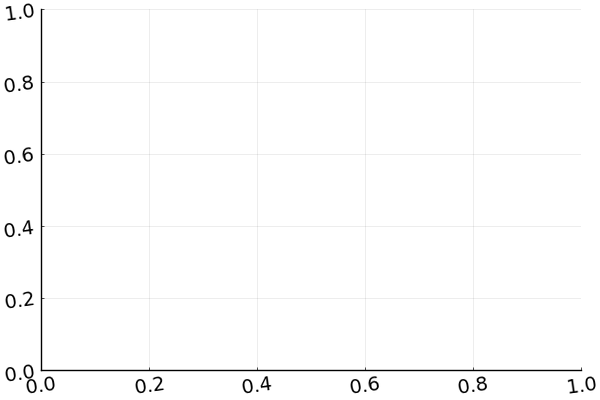

In [3]:
plot()